# Extract

In [1]:
# Import Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns

import datetime as dt

# File to Load
file_to_load1 = "cleaned_2011.csv"
file_to_load2 = "loan.csv"

# Read CSV File and store into Pandas data frame
loan_data = pd.read_csv(file_to_load1, low_memory=False)
df = pd.read_csv(file_to_load2, low_memory=False)

In [2]:
# This code will suprese the warning on the code
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action="ignore", category=RuntimeWarning)

# Transform

In [3]:
# Show data about columns for cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [4]:
# Filter 2011 data
df['year'] = pd.DatetimeIndex(df['issue_d']).year
df = df.loc[df.year == 2011]
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,year
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011


In [5]:
#Drop columns
df = df.drop(columns=["id", "desc",  "title", "zip_code", "collection_recovery_fee", "emp_title", "initial_list_status", "policy_code"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21721 entries, 0 to 22348
Data columns (total 67 columns):
member_id                      21721 non-null int64
loan_amnt                      21721 non-null float64
funded_amnt                    21721 non-null float64
funded_amnt_inv                21721 non-null float64
term                           21721 non-null object
int_rate                       21721 non-null float64
installment                    21721 non-null float64
grade                          21721 non-null object
sub_grade                      21721 non-null object
emp_length                     20962 non-null object
home_ownership                 21721 non-null object
annual_inc                     21721 non-null float64
verification_status            21721 non-null object
issue_d                        21721 non-null object
loan_status                    21721 non-null object
pymnt_plan                     21721 non-null object
url                            21721 n

# Initial Data Exploration

### We started with an overview of good loans to bad loans

In [7]:
df["loan_status"].value_counts()

Fully Paid            16470
Charged Off            3205
Current                1953
Late (31-120 days)       46
In Grace Period          28
Late (16-30 days)        11
Default                   8
Name: loan_status, dtype: int64

In [8]:
# loan_status cross with Totals
pd.crosstab(df.grade, df.loan_status, margins=True, margins_name="Total")

loan_status,Charged Off,Current,Default,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days),Total
grade,,,,,,,,
A,372,66,0,5314,1,1,0,5754
B,777,576,0,5196,6,2,8,6565
C,701,456,3,2762,8,2,10,3942
D,617,374,4,1781,5,2,13,2796
E,450,311,1,959,4,2,12,1739
F,222,139,0,354,3,2,2,722
G,66,31,0,104,1,0,1,203
Total,3205,1953,8,16470,28,11,46,21721


In [9]:
# loan_status cross with Totals
pd.crosstab(df.grade, df.loan_status, margins=True, margins_name="Total")

loan_status,Charged Off,Current,Default,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days),Total
grade,,,,,,,,
A,372,66,0,5314,1,1,0,5754
B,777,576,0,5196,6,2,8,6565
C,701,456,3,2762,8,2,10,3942
D,617,374,4,1781,5,2,13,2796
E,450,311,1,959,4,2,12,1739
F,222,139,0,354,3,2,2,722
G,66,31,0,104,1,0,1,203
Total,3205,1953,8,16470,28,11,46,21721


# Visualizations

### We began with a correlation matrix in order to get a quick overview of correlated factors in our data set

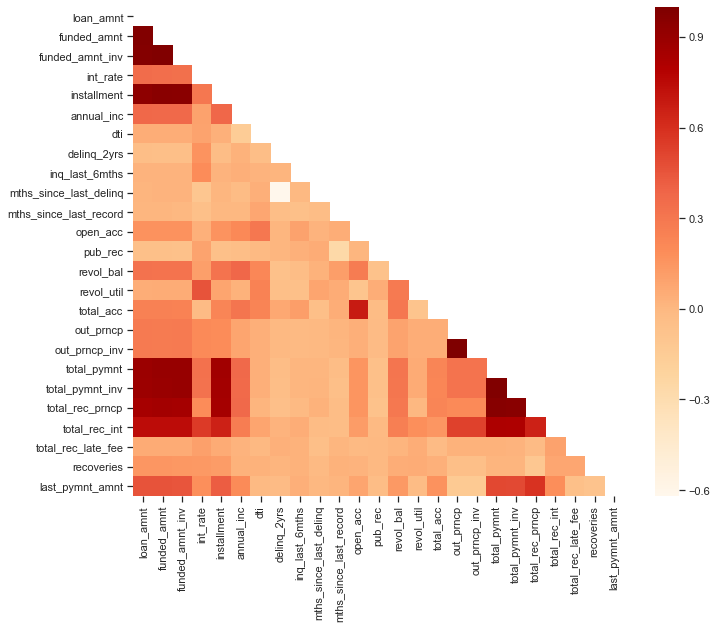

In [37]:
correlation_df = df.drop(columns = ["verification_status_joint", "application_type", 
                                    "last_credit_pull_d", "grade", "sub_grade", "emp_length", "term", 
                                    "home_ownership", "verification_status", "issue_d", "loan_status", 
                                    "pymnt_plan", "url", "purpose", "addr_state", "earliest_cr_line", 
                                    "last_pymnt_d", "next_pymnt_d", "last_credit_pull_d", "year", 
                                    "collections_12_mths_ex_med", "member_id", "total_bal_il", "inq_last_12m", 
                                    "total_cu_tl", "inq_fi", "total_rev_hi_lim", "all_util", "open_rv_24m", 
                                    "open_rv_12m", "il_util", "total_bal_il", "mths_since_rcnt_il", "open_il_24m", 
                                    "open_il_12m", "open_il_6m", "max_bal_bc", "open_acc_6m", 
                                    "tot_coll_amt", "tot_cur_bal", "acc_now_delinq", "dti_joint", 
                                    "annual_inc_joint", "mths_since_last_major_derog"])



corr = correlation_df.corr()

cmap="OrRd"

plt.subplots(figsize=(11, 9))

mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(correlation_df.corr(), cmap = cmap, mask = mask
           )

### We did a comparison of good loans to bad loans for the 2011 year]

In [11]:
# Sorting good and bad loans for the 2011 year

bad_loans = ["Charged Off", "Default", "In Grace Period", 
            "Late (16-30 days)", "Late (31-120 days)"]

good_loans = ["Fully Paid", "Current"]

def loan_sort(loan):
    if loan in bad_loans:
        return 'Bad Loan'
    else:
        return 'Good Loan'
    
    
df['loan_condition'] = df['loan_status'].apply(loan_sort)

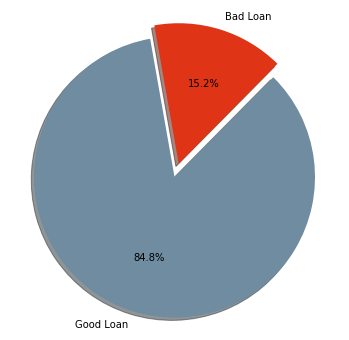

In [12]:
# Generate a pie plot showing the distribution of Loan Status

status_counts = df["loan_condition"].value_counts()
explode = [0, 0.1]

labels = ["Good Loan", "Bad Loan"]
colors = ["#6f8ca0", "#df3415"]

plt.figure(figsize=(6,6))
plt.pie(status_counts, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=100)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")

plt.show()

In [13]:
#grade_counts = df.grade.value_counts().plot.bar()
#status_counts = df.loan_status.value_counts().plot.bar()
#grade_counts
#status_counts

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

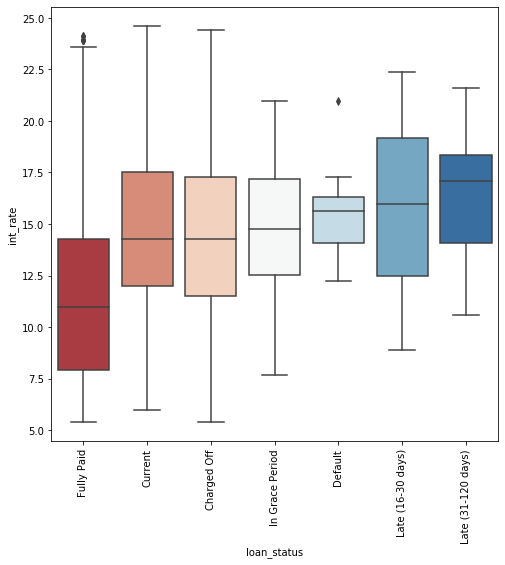

In [14]:
# Generate a boxplot showing an overview of loans by loan status
# sns.boxplot(x="day", y="total_bill", hue="smoker", data=df, palette="Set1")

display_order = ["Fully Paid", "Current", "Charged Off", "In Grace Period", 
                 "Default", "Late (16-30 days)", "Late (31-120 days)"]

plt.figure(figsize=(8,8))
sns.boxplot(
    x = "loan_status",
    y = "int_rate",
    data = df,
    palette = "RdBu", 
    order=display_order
)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

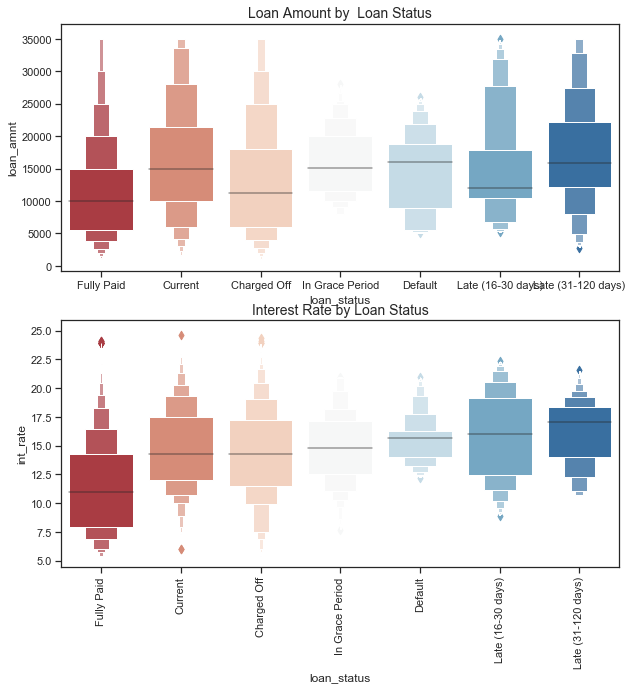

In [29]:
# Generate a catplot showing the distribution of interest rate by loan status

display_order = ["Fully Paid", "Current", "Charged Off", "In Grace Period", 
                 "Default", "Late (16-30 days)", "Late (31-120 days)"]

fig, ax = plt.subplots(2, 1, figsize=(10, 10))

sns.catplot(x="loan_status", y="loan_amnt", kind="boxen", ax=ax[0], data=df, palette = "RdBu", order=display_order)
ax[0].set_title("Loan Amount by  Loan Status", fontsize=14)
plt.close()
sns.catplot(x="loan_status", y="int_rate", kind="boxen", ax=ax[1], data=df, palette = "RdBu", order=display_order)
ax[1].set_title("Interest Rate by Loan Status", fontsize=14)
plt.close()
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Amount Funded')

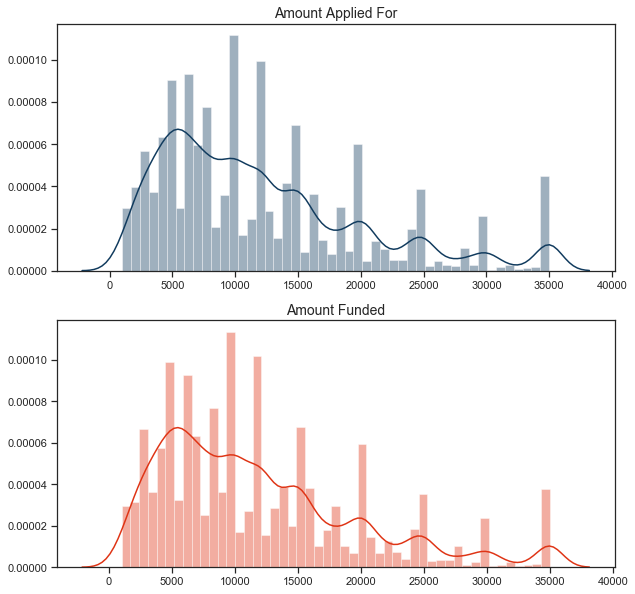

In [16]:
# Generate plots to compare distributions of loan applications and loans

sns.set(style="ticks")

fig, ax = plt.subplots(2, figsize=(10,10))

loan_amount = df["loan_amnt"].values
borrower_income = df["annual_inc"].values
funded_amount = df["funded_amnt"].values
installment = df["installment"].values


sns.distplot(loan_amount, ax=ax[0], color="#113b5e")
ax[0].set_title("Amount Applied For", fontsize=14)
sns.distplot(funded_amount, ax=ax[1], color="#df3415")
ax[1].set_title("Amount Funded", fontsize=14)
#sns.distplot(installment, ax=ax[1], color="#113b5e")
#ax[2].set_title("Installment", fontsize=14)

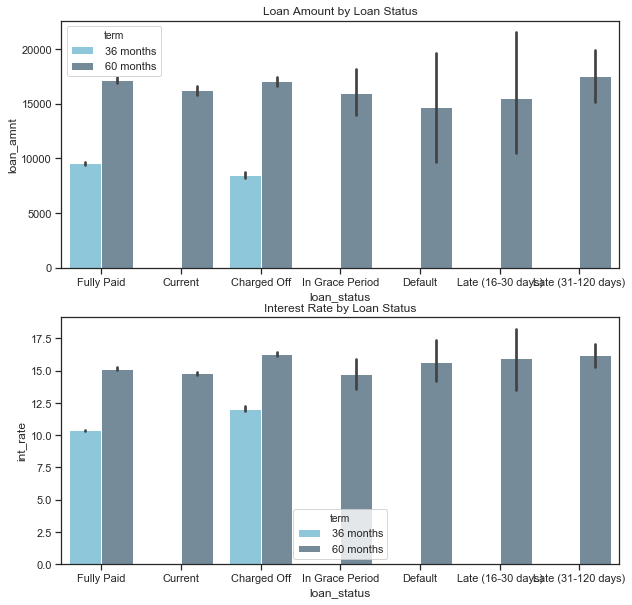

In [34]:
# Draw a nested barplot to show loan amount for loan status

fig, ax = plt.subplots(2, figsize=(10,10))

sns.catplot(x="loan_status", y="loan_amnt", hue="term", data=df,ax=ax[0],
            height=7, kind="bar", palette=["#82cde5", "#6f8ca0"], 
            order=display_order)
ax[0].set_title("Loan Amount by Loan Status")
plt.close()

sns.catplot(x="loan_status", y="int_rate", hue="term", data=df,ax=ax[1],
            height=7, kind="bar", palette=["#82cde5", "#6f8ca0"], 
            order=display_order, legend = "best fit")
ax[1].set_title("Interest Rate by Loan Status")
plt.close()

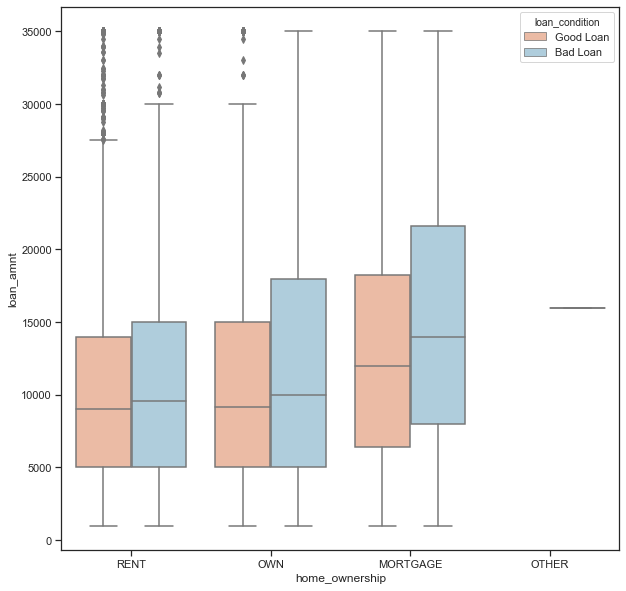

In [25]:
# Generate a boxplot to compare loan amounts by grade
sns.set(style="ticks")

# Load the example tips dataset
tips = sns.load_dataset("tips")
plt.subplots(figsize=(10,10))

#home_ownership = df.loc[df.home_ownership == ["RENT", "OWN", "MORTGAGE"]]

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="home_ownership", y="loan_amnt",
            hue="loan_condition", palette="RdBu",
            data=df)
#sns.despine(offset=12, trim=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

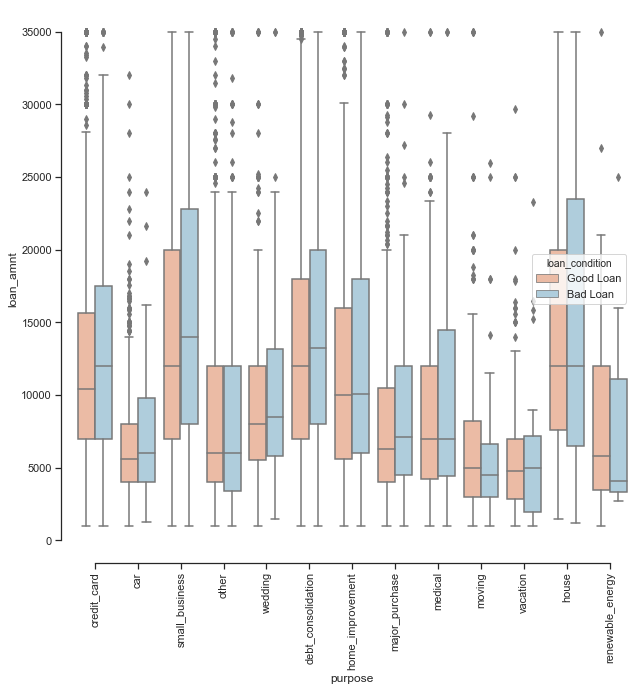

In [23]:
# Generate a boxplot to compare loan amounts by grade
sns.set(style="ticks")

# Load the example tips dataset
tips = sns.load_dataset("tips")
plt.subplots(figsize=(10,10))

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="purpose", y="loan_amnt",
            hue="loan_condition", palette="RdBu",
            data=df)
sns.despine(offset=12, trim=True)
plt.xticks(rotation=90)

In [ ]:
cross_df = pd.crosstab(df.loan_status, df.grade)
plt.subplots(figsize=(10,10))
cross_df["A"].plot(kind = "bar", color = "#6f1a0a")
cross_df["B"].plot(kind = "bar", color = "#3b8beb")
cross_df["C"].plot(kind = "bar", color = "#113b5e")
cross_df["D"].plot(kind = "bar", color = "#82cde5")
cross_df["E"].plot(kind = "bar", color = "#df3415")
cross_df["F"].plot(kind = "bar", color = "#f2e3d4")
cross_df["G"].plot(kind = "bar", color = "#31399B")



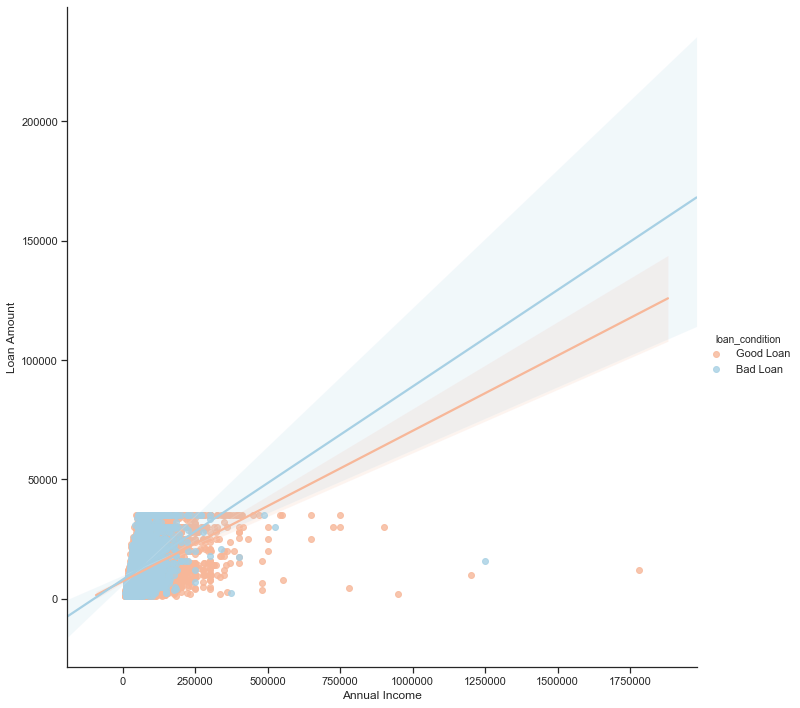

In [21]:
# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(x="annual_inc", y="loan_amnt", hue="loan_condition",
               height=10, data=df, palette = "RdBu")

# Use more informative axis labels than are provided by default
g.set_axis_labels("Annual Income", "Loan Amount")

In [ ]:
home_ownership